In [11]:
from math import inf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
xs = -2
xe = 2
ys = -2
ye = 2
xtics = 11
ytics = 11
num_p = 4001
x,y = np.meshgrid(np.linspace(xs, xe, num_p), np.linspace(ys, ye, num_p))

inf_comp = np.array(complex(inf, inf))
nanj = np.complex128(np.nan+(np.nan)*1j)

In [13]:
points = x + y*1j
z = np.zeros_like(points)
# z = points
iters = np.ones(points.shape)*np.inf

In [14]:
points = points[::-1]
print(points[0][0])

(-2+2j)


In [15]:
num_iter = 100
limit = 2
c = 1
d = 3

for i in range(1, num_iter+2):
    z = np.power(z, d) + points
    np.nan_to_num(z, copy=False, posinf=True)
    # z = np.square(z) + c
    cond = i/(np.abs(z)>=limit)
    iters = np.minimum(cond, iters)

<ipython-input-15-d1c1bf4076b4>:10: RuntimeWarning: divide by zero encountered in true_divide
  cond = i/(np.abs(z)>=limit)
<ipython-input-15-d1c1bf4076b4>:7: RuntimeWarning: overflow encountered in power
  z = np.power(z, d) + points
<ipython-input-15-d1c1bf4076b4>:7: RuntimeWarning: invalid value encountered in power
  z = np.power(z, d) + points
<ipython-input-15-d1c1bf4076b4>:10: RuntimeWarning: overflow encountered in absolute
  cond = i/(np.abs(z)>=limit)


In [16]:
print(np.max(iters))
print(np.min(iters))
print(np.isnan(z[500][500]))

print(np.abs(z[0][0])>2)

inf
1.0
False
True


In [17]:
rangex = np.linspace(0, num_p, xtics).tolist()
rangex = [int(x) for x in rangex]
rangey = np.linspace(0, num_p, ytics).tolist()
rangey = [int(y) for y in rangey]
tics_x = np.linspace(xs, xe, xtics).tolist()
tics_x = [round(x, 2) for x in tics_x]
tics_y = np.linspace(ys, ye, ytics).tolist()
tics_y = [round(y, 2) for y in tics_y]

In [18]:
iters[iters == np.inf] = np.NINF

[]

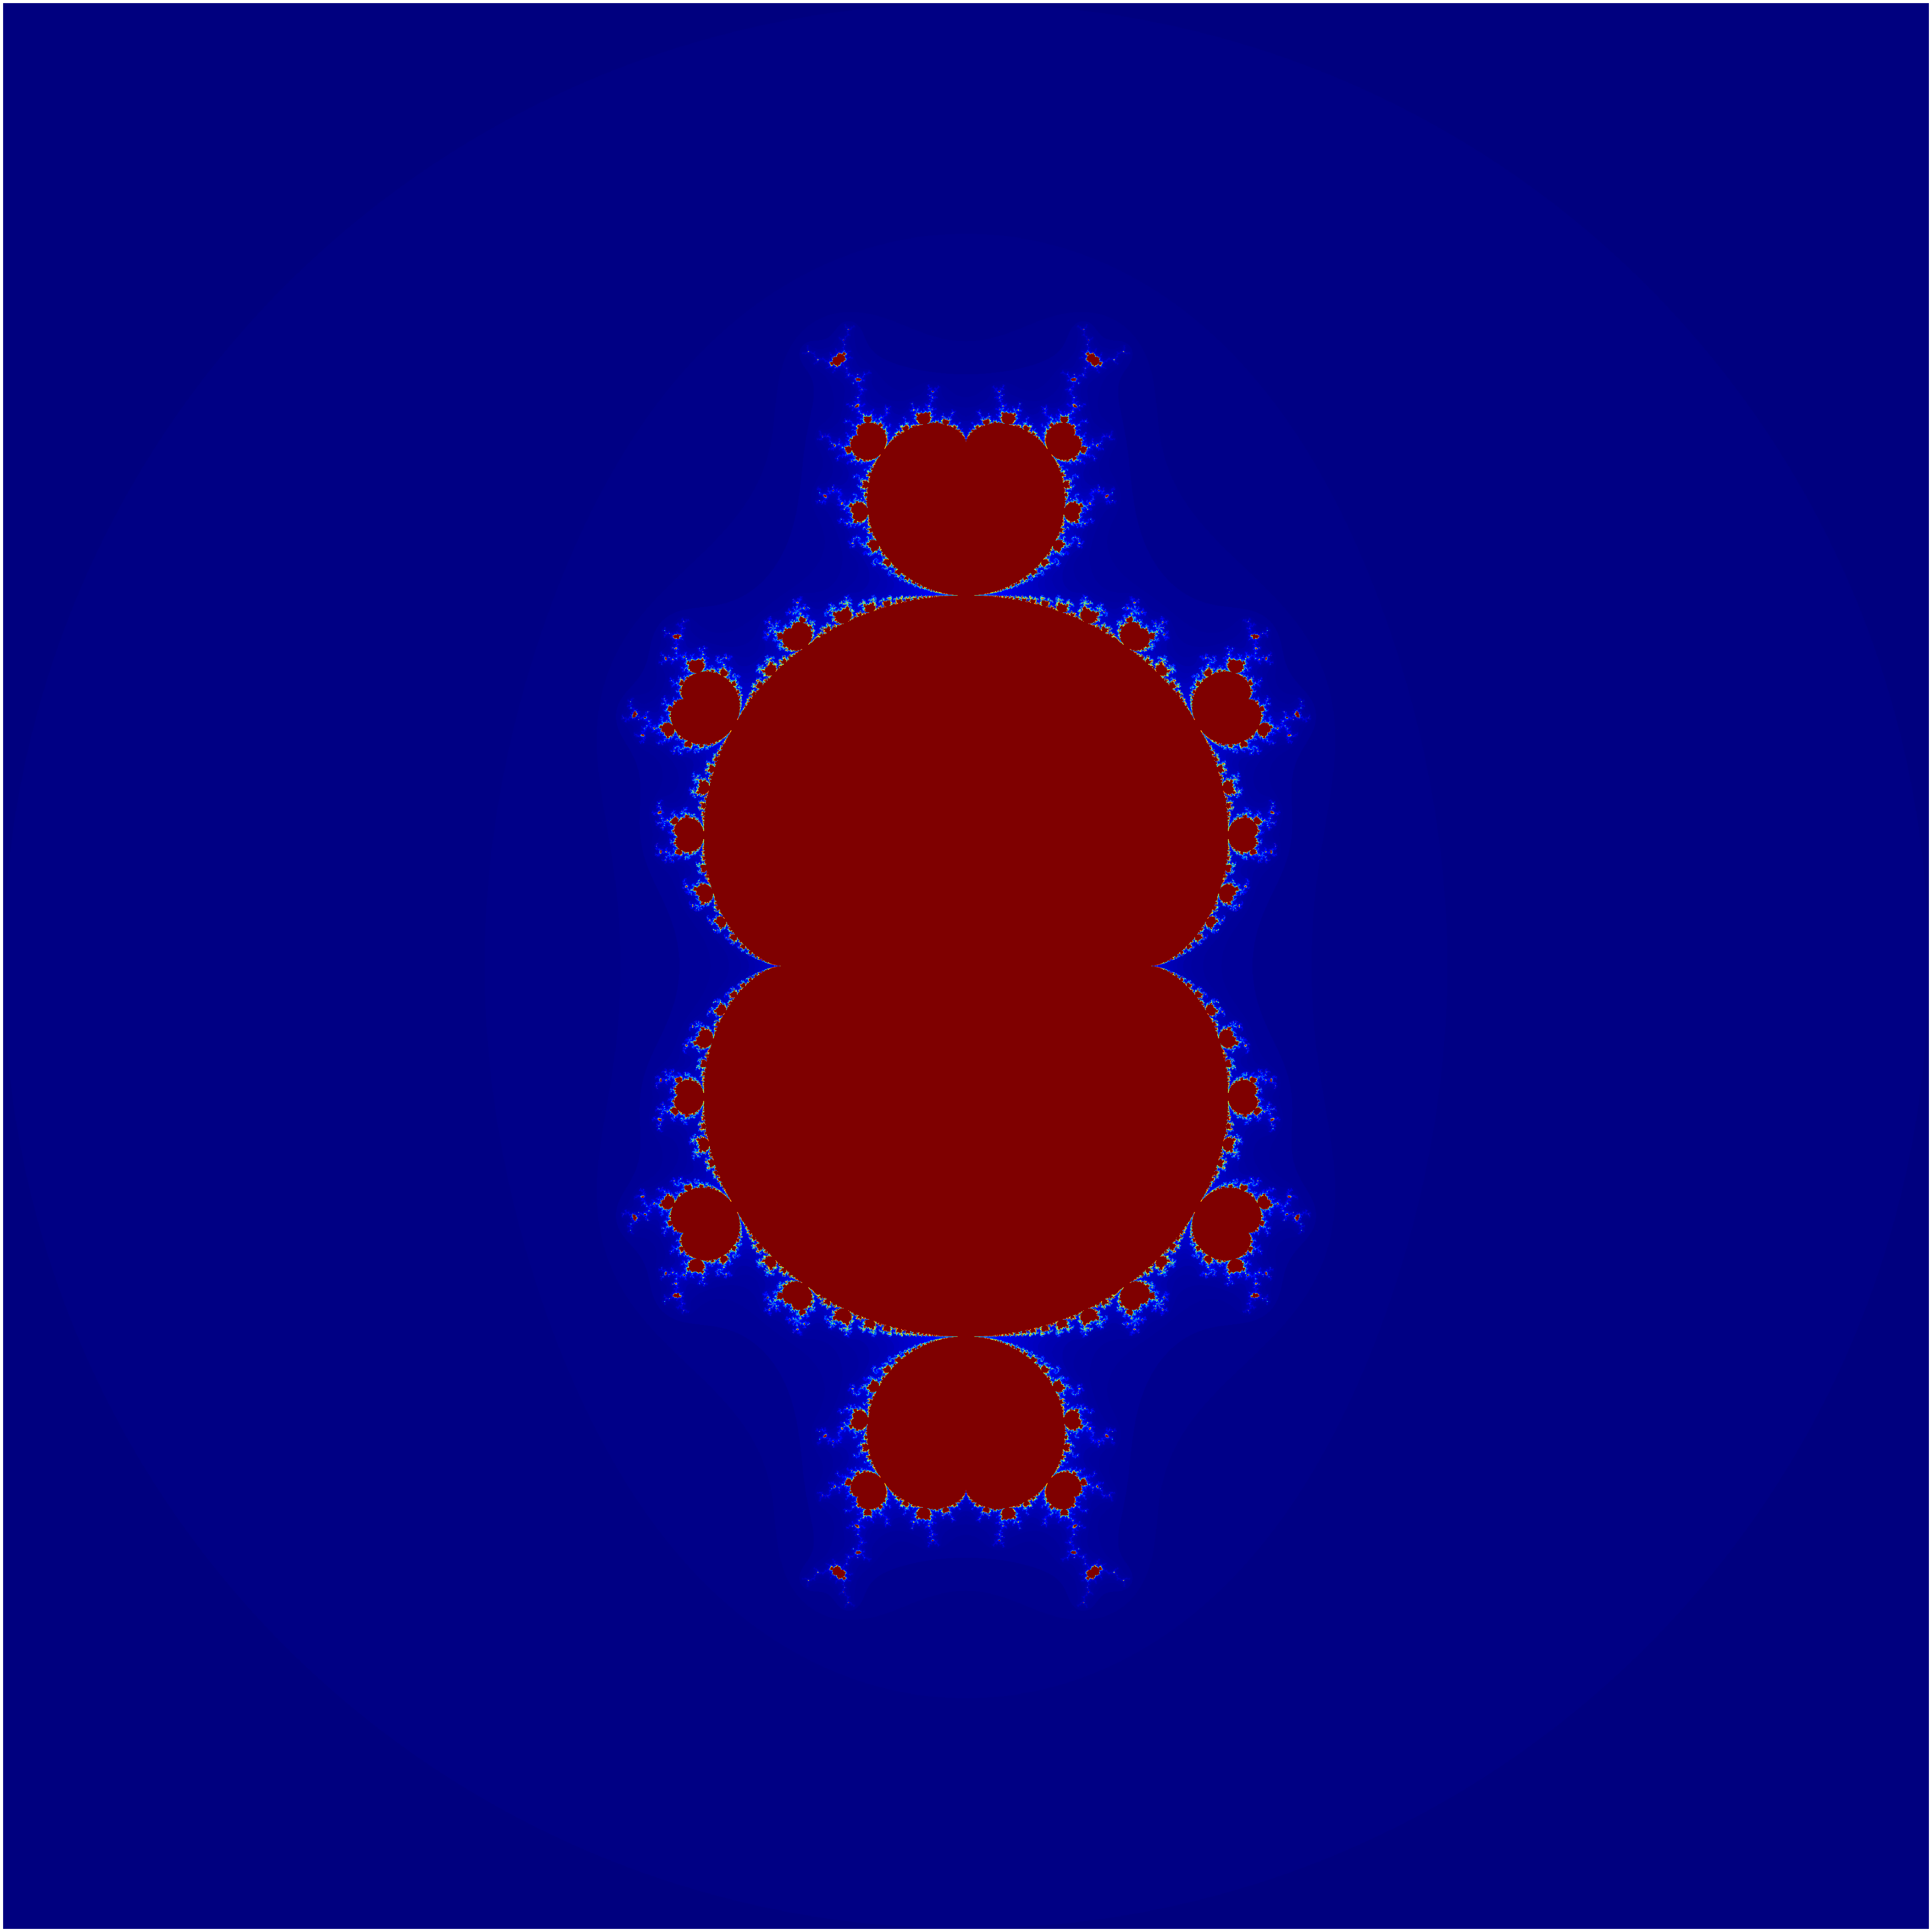

In [19]:
fig, ax = plt.subplots(figsize=(80, 80))
iters[iters == np.NINF] = np.max(iters)+100
ax.imshow(iters,cmap=plt.cm.jet)
plt.axis("off")
plt.plot()